In [5]:
import sys
sys.path = ["/Users/gregmartinez/.local/share/virtualenvs/codecademy-Di2IpTvJ/lib/python3.8/site-packages/"] + sys.path

In [7]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [15]:
pd.set_option("display.max_columns", 25)
pd.set_option("display.max_rows", 2000)
pd.set_option("precision", 2)

# Load and Investigate data

In [9]:
df = pd.read_csv(r"../flat_files/tennis_stats.csv")

In [11]:
len(df)

1721

In [16]:
df.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,BreakPointsOpportunities,BreakPointsSaved,DoubleFaults,ReturnGamesPlayed,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,7,0.43,2,9,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,0,0.57,1,9,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,8,0.40,1,19,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,6,0.40,0,14,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,0,0.50,2,3,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


In [17]:
df.describe()

,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,BreakPointsOpportunities,BreakPointsSaved,DoubleFaults,ReturnGamesPlayed,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
count,1721.00,1721.00,1721.00,1721.00,1721.00,1721.00,1721.00,1721.00,1721.00,1721.00,1721.00,1721.00,1721.00,1721.00,1721.00,1721.00,1721.00,1721.00,1721.00,1721.00,1721.00,1.72e+03,1721.00
mean,2013.65,0.60,0.68,0.26,0.48,0.47,97.11,0.37,112.00,102.92,0.57,49.11,198.31,0.17,0.34,197.65,0.72,0.47,0.60,7.88,9.28,2.34e+05,269.61
std,2.49,0.05,0.07,0.06,0.07,0.07,137.97,0.16,119.25,122.76,0.12,56.63,221.30,0.08,0.05,221.21,0.12,0.04,0.06,10.18,9.00,2.53e+05,277.34
min,2009.00,0.36,0.27,0.00,0.06,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.22,0.25,0.00,0.00,1.08e+02,3.00
25%,2012.00,0.57,0.65,0.24,0.46,0.44,7.00,0.32,15.00,9.00,0.52,6.00,22.00,0.13,0.32,22.00,0.67,0.46,0.57,0.00,2.00,4.93e+04,83.00
50%,2014.00,0.60,0.69,0.27,0.49,0.48,34.00,0.38,55.00,41.00,0.59,23.00,86.00,0.18,0.35,86.00,0.75,0.48,0.61,3.00,5.00,1.25e+05,166.00
75%,2016.00,0.63,0.72,0.29,0.52,0.50,140.00,0.43,201.00,172.00,0.63,80.00,349.00,0.22,0.37,348.00,0.79,0.50,0.63,13.00,17.00,3.50e+05,333.00
max,2017.00,0.88,0.89,0.48,0.92,0.75,1185.00,1.00,507.00,573.00,1.00,309.00,910.00,0.56,0.51,916.00,1.00,0.82,0.82,48.00,36.00,1.07e+06,1443.00


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      1721 non-null   object 
 1   Year                        1721 non-null   int64  
 2   FirstServe                  1721 non-null   float64
 3   FirstServePointsWon         1721 non-null   float64
 4   FirstServeReturnPointsWon   1721 non-null   float64
 5   SecondServePointsWon        1721 non-null   float64
 6   SecondServeReturnPointsWon  1721 non-null   float64
 7   Aces                        1721 non-null   int64  
 8   BreakPointsConverted        1721 non-null   float64
 9   BreakPointsFaced            1721 non-null   int64  
 10  BreakPointsOpportunities    1721 non-null   int64  
 11  BreakPointsSaved            1721 non-null   float64
 12  DoubleFaults                1721 non-null   int64  
 13  ReturnGamesPlayed           1721 

# EDA

In [30]:
id_cols = ["Player", "Year"]
offensive_cols = [
    "Aces",
    "DoubleFaults",
    "FirstServe",
    "FirstServePointsWon",
    "SecondServePointsWon",
    "BreakPointsFaced",
    "BreakPointsSaved",
    "ServiceGamesPlayed",
    "ServiceGamesWon",
    "TotalServicePointsWon"
]
defensive_cols = [
    "FirstServeReturnPointsWon",
    "SecondServeReturnPointsWon",
    "BreakPointsOpportunities",
    "BreakPointsConverted",
    "ReturnGamesPlayed",
    "ReturnGamesWon",
    "ReturnPointsWon",
    "TotalPointsWon"
]
outcomes = [
    "Wins",
    "Losses",
    "Winnings",
    "Ranking"
]

In [35]:
df_offensive = df[offensive_cols]

In [31]:
df_defensive = df[defensive_cols]

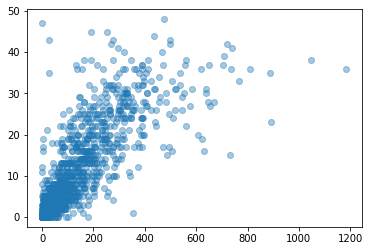

In [32]:
plt.scatter(x=df["Aces"], y=df["Wins"], alpha=0.4)
plt.show()

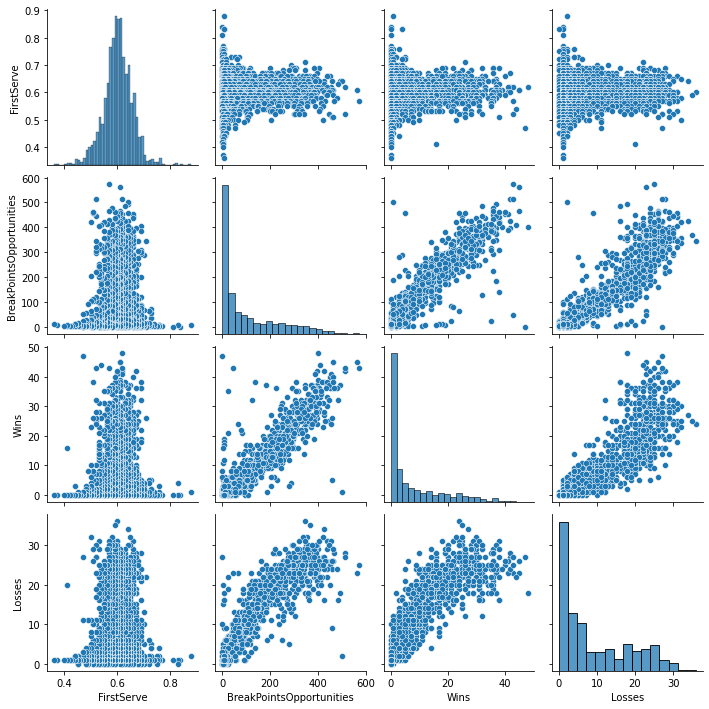

In [46]:
sns.pairplot(data=df[["FirstServe", "BreakPointsOpportunities", "Wins", "Losses"]])
plt.show()

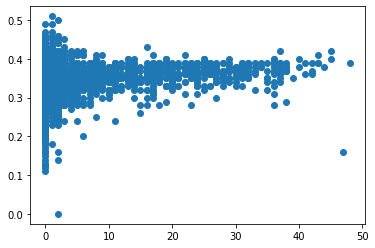

In [45]:
plt.scatter(x=df["Wins"], y=df["ReturnPointsWon"])
plt.show()

# Single Feature Linear Regression

In [114]:
X_single = df[["BreakPointsOpportunities"]]
y = df[["Wins"]]

# X_single = X_single.reshape(-1, 1)

In [115]:
x_train, x_test, y_train, y_test = train_test_split(X_single, y, test_size=0.8, train_size=0.2)

In [116]:
slr = LinearRegression()

In [117]:
slr.fit(x_train, y_train)

LinearRegression()

In [118]:
slr.score(x_test, y_test)

0.8511035621315503

In [119]:
y_predict = slr.predict(x_test)

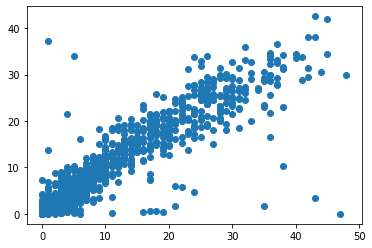

In [121]:
plt.scatter(y_test, y_predict)
# plt.scatter(df["BreakPointsOpportunities"], df["Wins"], color=)
plt.show()

In [122]:
X_single2 = df[["Aces"]]

In [123]:
x_train, x_test, y_train, y_test = train_test_split(X_single2, y, train_size=0.8, test_size=0.2)

In [124]:
slr2 = LinearRegression()

In [125]:
slr2.fit(x_train, y_train)

LinearRegression()

In [126]:
slr2.score(x_train, y_train)

0.6799312318456086

In [127]:
prediction = slr2.predict(x_test)

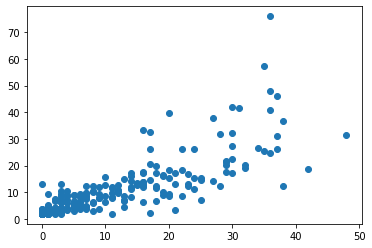

In [129]:
plt.scatter(y_test, prediction)
plt.show()

# Two Feature Linear Regression

In [130]:
X_two = df[["Aces", "BreakPointsOpportunities"]]
y = df[["Winnings"]]

In [131]:
x_train, x_test, y_train, y_test = train_test_split(X_two, y, train_size=0.8, test_size=0.2)

In [132]:
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_train, y_train)

0.8228457507074258

In [133]:
y_pred = model.predict(x_test)

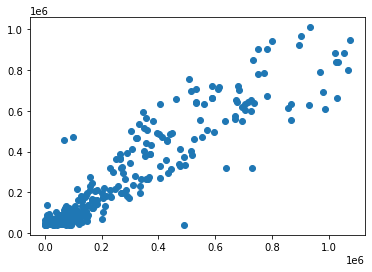

In [134]:
plt.scatter(y_test, y_pred)
plt.show()

# Multiple Feature Linear Regression

In [136]:
X_mult = df[["Aces", "BreakPointsOpportunities", "FirstServe"]]
y = df[["Winnings"]]

In [137]:
x_train, x_test, y_train, y_test = train_test_split(X_mult, y, train_size=0.8)

In [138]:
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_train, y_train)

0.8521951484836057

In [139]:
predict = model.predict(x_test)

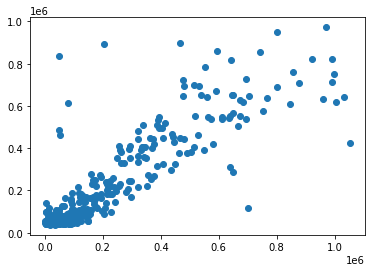

In [140]:
plt.scatter(y_test, predict)
plt.show()